# Proyek Analisis Data

-  Nama : Rama Febradian Putera
-  Email : ramafebradian@gmail.com
-  ID Dicoding : ramafebradian

## 1. Pengenalan Proyek
---

### 1.1 Latar Belakang

Sistem berbagi sepeda adalah generasi baru dari persewaan sepeda tradisional di mana seluruh proses mulai dari keanggotaan, penyewaan, dan pengembalian menjadi otomatis. Melalui sistem ini, pengguna dapat dengan mudah menyewa sepeda dari posisi tertentu dan kembali lagi ke posisi lain. Saat ini, terdapat lebih dari 500 program berbagi sepeda di seluruh dunia yang mencakup lebih dari 500 ribu sepeda. Saat ini, terdapat minat yang besar terhadap sistem ini karena peran pentingnya dalam masalah lalu lintas, lingkungan dan kesehatan. 

Terlepas dari penerapan sistem bike sharing di dunia nyata yang menarik, karakteristik data yang dihasilkan oleh sistem ini menjadikannya menarik untuk penelitian. Berbeda dengan layanan transportasi lain seperti bus atau kereta bawah tanah, durasi perjalanan, posisi keberangkatan dan kedatangan dicatat secara eksplisit dalam sistem ini. Fitur ini mengubah sistem bike sharing menjadi jaringan sensor virtual yang dapat digunakan untuk mendeteksi mobilitas dalam kota. Oleh karena itu, diharapkan sebagian besar peristiwa penting di kota dapat dideteksi melalui pemantauan data ini.

### 1.2 Data Set

Proses penyewaan sepeda sangat berkorelasi dengan kondisi lingkungan dan musim. Misalnya, kondisi cuaca, curah hujan, hari dalam seminggu, musim, jam dalam sehari, dll. dapat mempengaruhi perilaku persewaan. Kumpulan data inti terkait dengan catatan sejarah dua tahun yang sesuai dengan tahun 2011 dan 2012 dari sistem Capital Bikeshare, Washington D.C., AS yang tersedia untuk umum di http://capitalbikeshare.com/system-data.

Data dikumpulkan setiap jam kemudian diekstraksi dan ditambahkan informasi cuaca dan musiman yang sesuai. Informasi cuaca diambil dari http://www.freemeteo.com.

## 2. Mendefinisikan Pertanyaan Bisnis

1. Bagaimana tren jumlah penggunaan _bike sharing_ dalam beberapa tahun terakhir?
2. Bagaimana pola penggunaan wahana _bike sharing_ berdasarkan hari dalam seminggu?
3. Apakah cuaca mempengaruhi penggunaan bikeshare?
4. Musim apa yang paling banyak aktivitas berbagi sepeda?

## 3. Menyiapkan semua library yang dibutuhkan
---

Impor library yang diperlukan untuk manipulasi data, analisis data, dan visualisasi data

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import calendar

## 4. Data Wrangling
---

### 4.1 Gathering Data

In [6]:
df = pd.read_csv("https://raw.githubusercontent.com/ramafebradian/Bike-Sharing-Project/main/submission_Rama_Febradian/Data/hour.csv")

In [7]:
df.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,1/1/2011,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,1/1/2011,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,1/1/2011,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,1/1/2011,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,1/1/2011,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


### Dataset Dictionary

- instant: record index
	- dteday : date
	- season : season (1:winter, 2:spring, 3:summer, 4:fall)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : df (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed in miles per df. The values are divided to 67 (max)
	- casual: count of casual user rides
	- registered: count of registered user rides
	- cnt: count of total rental bike rides including both casual and registered

### 4.2 Assessing Data

### Menilai tabel

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


- Kami akan mengonversi variabel `dteday` menjadi tipe data tanggal
- Variabel `season`, `weekday`, dan `mnth` direpresentasikan dalam bilangan bulat, kita akan mengubahnya menjadi nilai stringnya masing-masing.
- Variabel `tahun` direpresentasikan sebagai 0 untuk tahun 2011 dan 1 untuk tahun 2012. Kita akan mengubahnya ke nilainya masing-masing.

### Memastikan tidak ada nilai yang hilang

In [9]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Rupanya tidak ada nilai yang hilang dalam dataset

### Memastikan tidak ada nilai yang terduplikasi

In [10]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


Rupanya tidak ada nilai yang terduplikasi dalam dataset

### Mengeksplorasi Parameter Statistik

In [11]:
df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,1/1/2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [12]:
print(df.shape)

(17379, 17)


- Dataset terdiri dari 17379 baris dan 17 kolom
- Seperti yang dijelaskan dalam kamus kumpulan data, variabel `temp`, `atemp`, `hum` dan `windspeed` dinormalisasi. Untuk mendapatkan pemahaman yang lebih baik tentang kondisi kehidupan nyata, kami akan mengoreksi nilai-nilai ini sebelum dinormalisasi.

### Assessing Data Summary

- Ubah variabel `dteday` menjadi tipe data tanggal
- Variabel `season`, `weekday`, dan `mnth` direpresentasikan dalam bilangan bulat, kita akan mengubahnya menjadi nilai stringnya masing-masing.
- Variabel `tahun` direpresentasikan sebagai 0 untuk tahun 2011 dan 1 untuk tahun 2012. Kita akan mengubahnya ke nilainya masing-masing.
- Seperti yang dijelaskan dalam kamus kumpulan data, variabel `temp`, `atemp`, `hum` dan `windspeed` dinormalisasi. Untuk mendapatkan pemahaman yang lebih baik tentang kondisi kehidupan nyata, kami akan mengoreksi nilai-nilai ini sebelum dinormalisasi.

### 4.3 Cleaning Data

Melakukan pembersihan data berdasarkan temuan dalam penilaian data

### Mengubah tipe data `dteday`

In [13]:
df['dteday'] = pd.to_datetime(df['dteday'])

In [14]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Perbaiki nilai variabel `season`, `weekday`, dan `month`

In [15]:
df['weekday'] = df['dteday'].dt.day_name()

In [16]:
df.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32


In [17]:
df['mnth'] = df['dteday'].dt.month_name()

In [18]:
df.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,January,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,January,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,January,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32


In [19]:
# ganti nilai integer musim dengan setiap musim terkait
def find_season(season):
    season_string = {1:'Winter', 2:'Spring', 3:'Summer', 4:'Fall'}
    return season_string.get(season)

season_list = []

for season in df['season']:
    season = find_season(season)
    season_list.append(season)
    
df['season'] = season_list

In [20]:
df.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,0,January,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,0,January,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,0,January,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32


### Perbaiki nilai variabel `yr`

In [21]:
df['yr'] = df['dteday'].dt.year

In [22]:
df.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,January,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,2011,January,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,2011,January,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32


In [23]:
df['temp'] = df['temp']*41
df['atemp'] = df['atemp']*50
df['hum'] = df['hum']*100
df['windspeed'] = df['windspeed']*67

In [24]:
df.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,January,0,0,Saturday,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,Winter,2011,January,1,0,Saturday,0,1,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,Winter,2011,January,2,0,Saturday,0,1,9.02,13.635,80.0,0.0,5,27,32


## 5. Exploratory Data Analysis

In [25]:
df.dtypes

instant                int64
dteday        datetime64[ns]
season                object
yr                     int32
mnth                  object
hr                     int64
holiday                int64
weekday               object
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

### Histogram

In [26]:
# mengekstrak 4 variabel
float_vars = ['temp', 'atemp', 'hum', 'windspeed']
df_float = df[float_vars]

df_float.describe()

,temp,atemp,hum,windspeed
count,17379.000000,17379.000000,17379.000000,17379.000000
mean,20.376474,23.788755,62.722884,12.736540
std,7.894801,8.592511,19.292983,8.196795
min,0.820000,0.000000,0.000000,0.000000
25%,13.940000,16.665000,48.000000,7.001500
50%,20.500000,24.240000,63.000000,12.998000
75%,27.060000,31.060000,78.000000,16.997900
max,41.000000,50.000000,100.000000,56.996900


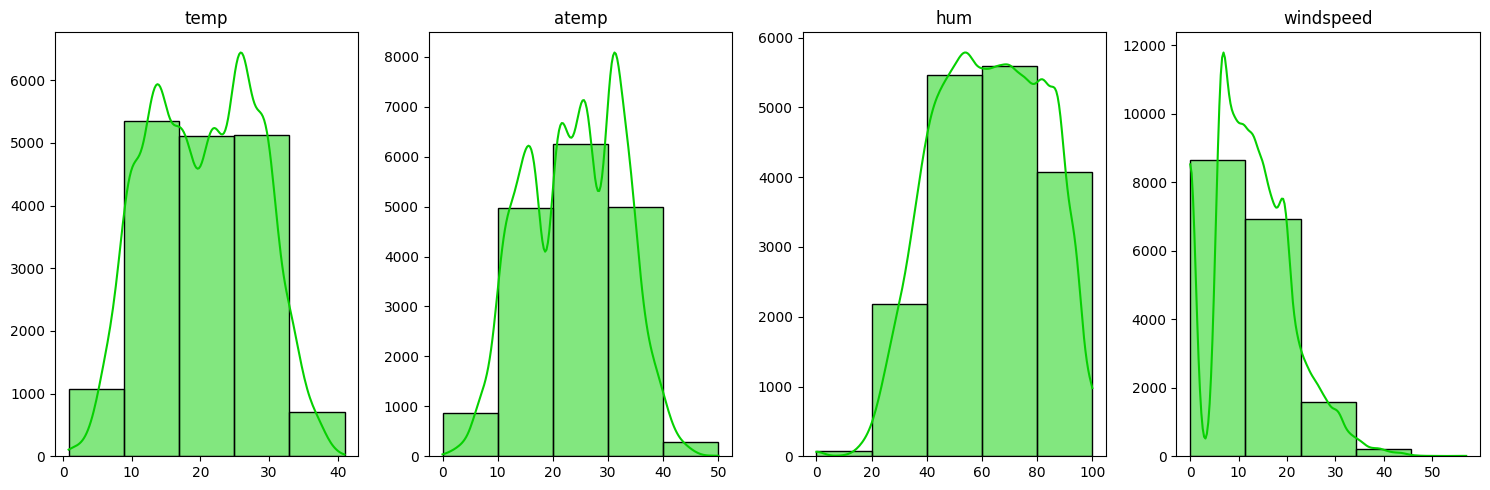

In [27]:
# membuat figure dan 4 subplots
fig, axs = plt.subplots(1, 4, figsize=(15,5))

for i, ax in enumerate(axs):
    sns.histplot(x=df_float[float_vars[i]], ax=ax, kde=True, bins=5, color='#06D001')
    
    # set the title and labels
    ax.set_title(float_vars[i])
    ax.set_xlabel("")
    ax.set_ylabel("")
    
plt.tight_layout()

plt.show()

### Boxplot

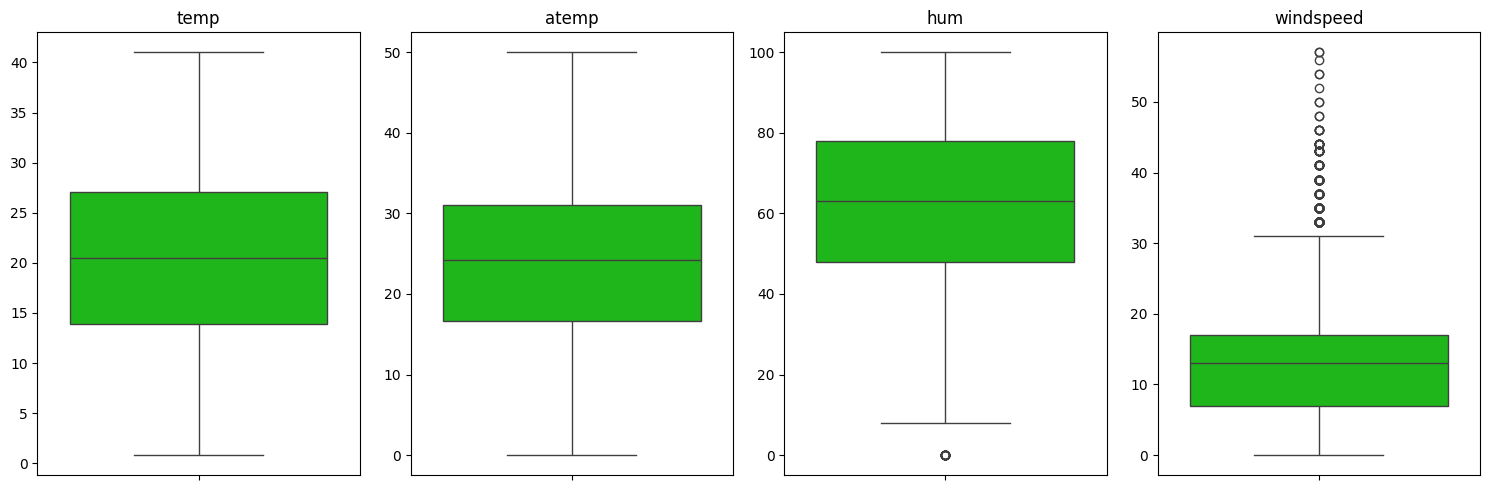

In [28]:
# membuat figure dan 4 subplots
fig, axs = plt.subplots(1, 4, figsize=(15,5))

for i, ax in enumerate(axs):
    sns.boxplot(y=df_float[float_vars[i]], orient='v', ax=ax, color='#06D001')

    # Set the title and labels
    ax.set_title(float_vars[i])
    ax.set_ylabel("")

plt.tight_layout()

plt.show()

### Histogram and Boxplot of bike-share users

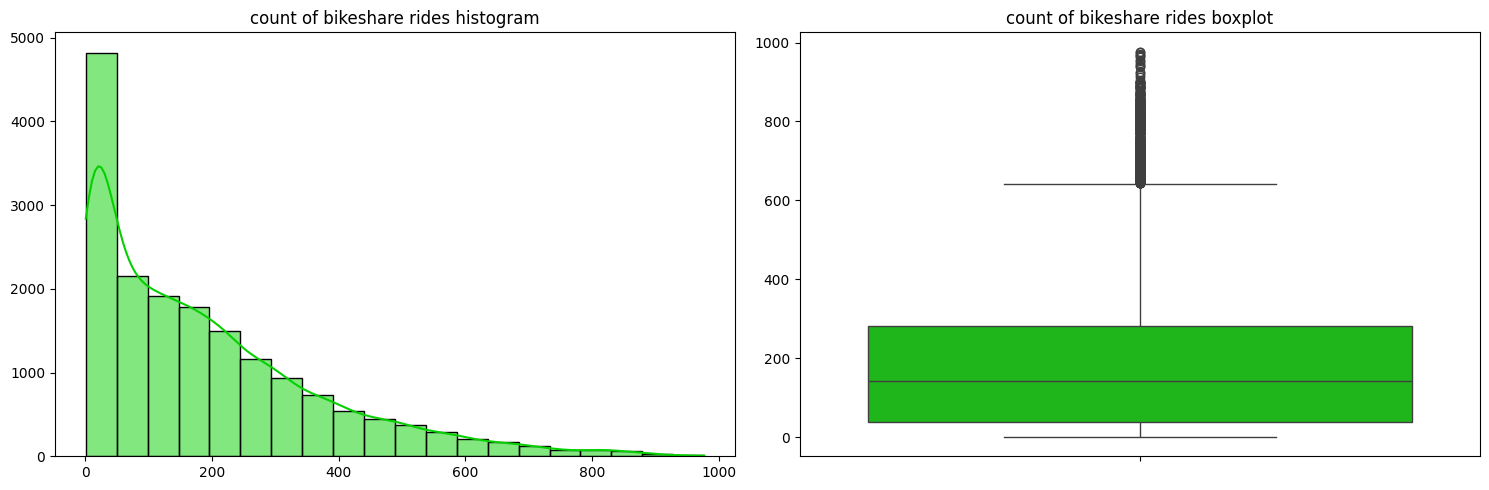

In [29]:
#membuat figure dan 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))


sns.histplot(df['cnt'], kde=True, bins=20, ax = axs[0], color='#06D001')
axs[0].set_title("count of bikeshare rides histogram")
axs[0].set_xlabel("")
axs[0].set_ylabel("")

sns.boxplot(y=df['cnt'], ax = axs[1], color='#06D001')
axs[1].set_title("count of bikeshare rides boxplot")
axs[1].set_xlabel("")
axs[1].set_ylabel("")


# Adjust the layout of the subplots
plt.tight_layout()

# Show the plot
plt.show()

- Histogram untuk `temp`, `atemp`, dan `hum` menunjukkan distribusi normal, sedangkan untuk `windspeed` miring ke kanan. Hal ini juga dapat kita simpulkan dengan mengamati nilai mean dan median pada masing-masing variabel.
- Boxplot untuk `temp`, `atemp`, dan `hum` tidak menunjukkan outlier, sedangkan untuk `windspeed` outlier teramati.
- Histogram untuk menghitung jika wahana bikeshare miring ke kanan. Ada juga outlier yang diamati dalam plot kotak.
- Meskipun ada outlier dalam variabel `windspeed`, kami melihat bahwa nilai maksimumnya adalah 87 mph, dan ini bukan anomali dan mungkin terjadi dalam kehidupan nyata. Jadi kami tidak akan menghapus outlier dalam kasus ini.
- Mirip dengan `windspeed`, outlier tidak akan dihapus karena mungkin saja ada hari-hari dengan jumlah perjalanan yang sangat tinggi.

### Menghitung perbandingan jumlah pengguna `casual` dan `registered`

C:\Users\User\AppData\Local\Temp\ipykernel_11772\2037586534.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Registered","Casual"], y=[registered_sum,casual_sum], palette=["#06D001","#36C2CE"])


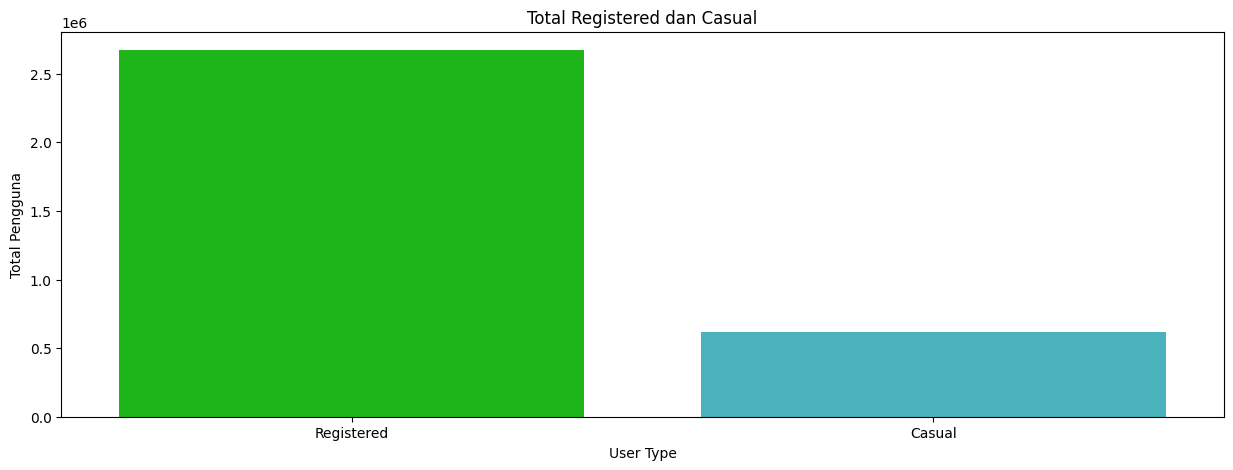

Jumalah Registered: 2672662
Jumlah Casual: 620017


In [30]:
registered_sum = df['registered'].sum()
casual_sum = df['casual'].sum()

plt.figure(figsize=(15,5))

# Membuat bar chart menggunakan plt.bar() function
sns.barplot(x=["Registered","Casual"], y=[registered_sum,casual_sum], palette=["#06D001","#36C2CE"])

# Menambahkan Judul dan label kedalam plot
plt.xlabel("User Type")
plt.ylabel("Total Pengguna")
plt.title("Total Registered dan Casual")
# Menampilkan plot
plt.show()

print(f"Jumalah Registered: {registered_sum}")
print(f"Jumlah Casual: {casual_sum}")

## 6. Visualization and Explanatory Data Analysis
---

    Menjawab pertanyaan bisnis
1. Bagaimana tren jumlah penggunaan _bike sharing_ dalam beberapa tahun terakhir?
2. Bagaimana pola penggunaan wahana _bike sharing_ berdasarkan hari dalam seminggu?
3. Apakah ada korelasi antara suhu yang mengindikasikan kondisi saat aktivitas berbagi sepeda sedang tinggi?
4. Musim apa yang paling banyak aktivitas berbagi sepeda?

### 6.1. Bagaimana tren jumlah penggunaan _bike sharing_ dalam beberapa tahun terakhir?

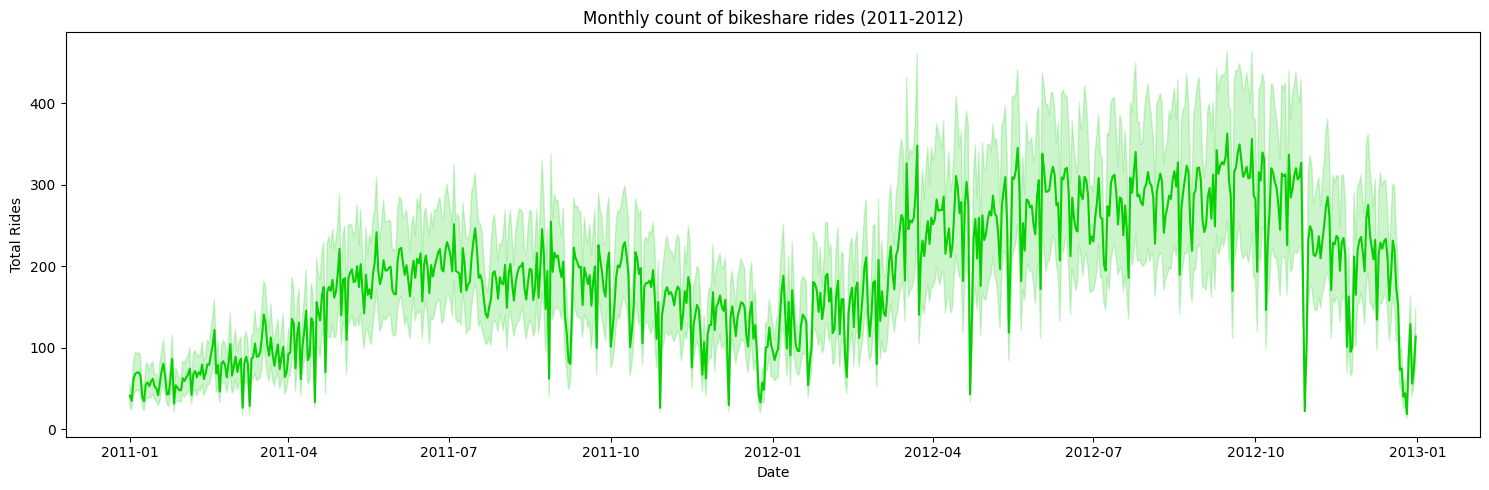

In [31]:
plt.figure(figsize=(15,5))

# Membuat garis plot mengunakan sns.lineplot() function
sns.lineplot(x="dteday", y="cnt", data=df, color='#06D001')

# Menambahkan Judul dan Label ke dalam plot
plt.xlabel("Date")
plt.ylabel("Total Rides")
plt.title("Monthly count of bikeshare rides (2011-2012)")

# Menampilkan plot
plt.tight_layout()
plt.show()

Agar lebih mudah diinterpretasikan, mari kita putar ke angka bulanan. Dengan menggunakan `resample`, kami akan menggabungkan data berdasarkan deret waktu (dari harian hingga bulanan)

In [32]:
monthly_users_df = df.resample(rule='ME', on='dteday').agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

monthly_users_df.head(3)

,casual,registered,cnt
dteday,,,
2011-01-31,3073,35116,38189
2011-02-28,6242,41973,48215
2011-03-31,12826,51219,64045


In [33]:
monthly_users_df.index = monthly_users_df.index.strftime('%b-%y')
monthly_users_df.head()

,casual,registered,cnt
dteday,,,
Jan-11,3073,35116,38189
Feb-11,6242,41973,48215
Mar-11,12826,51219,64045
Apr-11,22346,72524,94870
May-11,31050,104771,135821


In [34]:
monthly_users_df = monthly_users_df.reset_index()

In [35]:
monthly_users_df = monthly_users_df.rename(columns={'dteday': 'yearmonth'})

In [36]:
monthly_users_df.head()

,yearmonth,casual,registered,cnt
0,Jan-11,3073,35116,38189
1,Feb-11,6242,41973,48215
2,Mar-11,12826,51219,64045
3,Apr-11,22346,72524,94870
4,May-11,31050,104771,135821


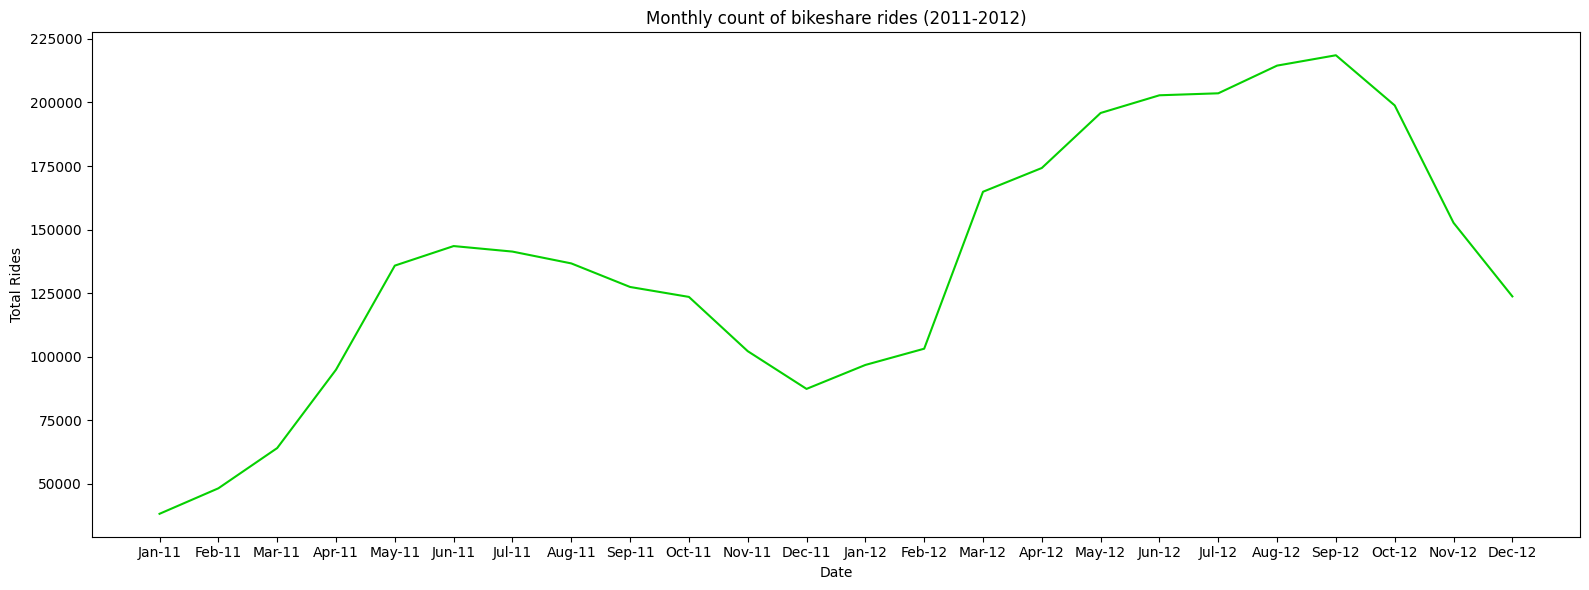

In [37]:
plt.figure(figsize=(16,6))

# Membuat Line plot menggunakan sns.lineplot()
sns.lineplot(x="yearmonth", y="cnt", data=monthly_users_df, color='#06D001')

# Menambahkan Judul dan Label
plt.xlabel("Date")
plt.ylabel("Total Rides")
plt.title("Monthly count of bikeshare rides (2011-2012)")

# Menampilkan Plot
plt.tight_layout()
plt.show()

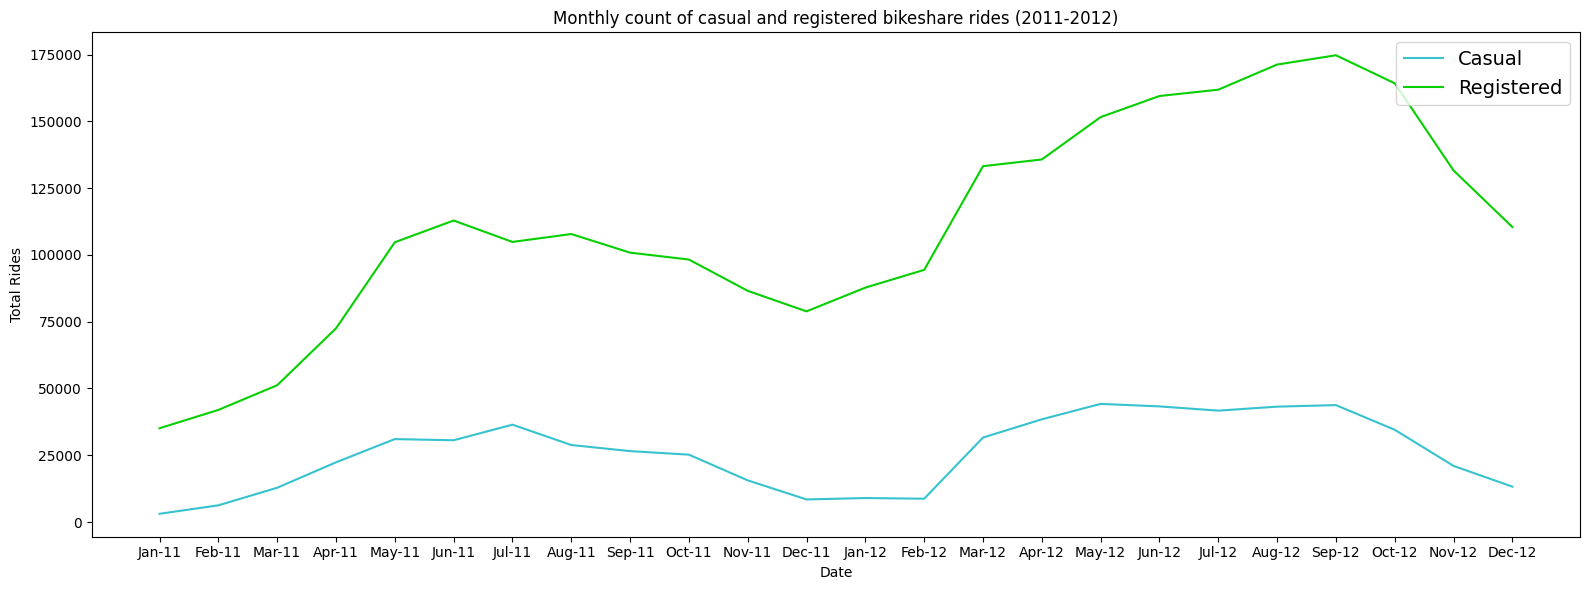

In [38]:
plt.figure(figsize=(16,6))

# Membuat Line plot menggunakan sns.lineplot()
sns.lineplot(x="yearmonth", y="casual", data=monthly_users_df, label='Casual', color='#36C2CE')
sns.lineplot(x="yearmonth", y="registered", data=monthly_users_df, label='Registered', color='#06D001')

# Menambahkan Judul dan Label
plt.xlabel("Date")
plt.ylabel("Total Rides")
plt.title("Monthly count of casual and registered bikeshare rides (2011-2012)")

# Menambahkan function legend ke plot
plt.legend(loc='upper right', fontsize=14)

# Menampilkan plot
plt.tight_layout()
plt.show()

**Insight**
1. Jumlah perjalanan bikeshare pada tahun 2012 lebih tinggi dibandingkan tahun 2011.
2. Kita bisa melihat adanya musim dalam 2 tahun tersebut. Jumlah perjalanan bikeshare biasanya mulai rendah di awal tahun, lalu mulai meningkat di Q2, lalu mulai menurun di Q4.
3. Jumlah aktivitas bersepeda bersama yang terdaftar lebih tinggi dibandingkan aktivitas santai, meskipun keduanya menunjukkan tren yang sama sepanjang tahun.

### 6.2. Bagaimana pola penggunaan wahana _bike sharing_ berdasarkan hari dalam seminggu?

In [39]:
weekday_users_df = df.groupby("weekday").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

weekday_users_df

,casual,registered,cnt
weekday,,,
Friday,78238,409552,487790
Monday,70784,384719,455503
Saturday,153852,323955,477807
Sunday,140521,303506,444027
Thursday,61460,423935,485395
Tuesday,57843,411266,469109
Wednesday,57319,415729,473048


In [40]:
weekday_users_df = weekday_users_df.reset_index()
weekday_users_df

,weekday,casual,registered,cnt
0,Friday,78238,409552,487790
1,Monday,70784,384719,455503
2,Saturday,153852,323955,477807
3,Sunday,140521,303506,444027
4,Thursday,61460,423935,485395
5,Tuesday,57843,411266,469109
6,Wednesday,57319,415729,473048


In [41]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

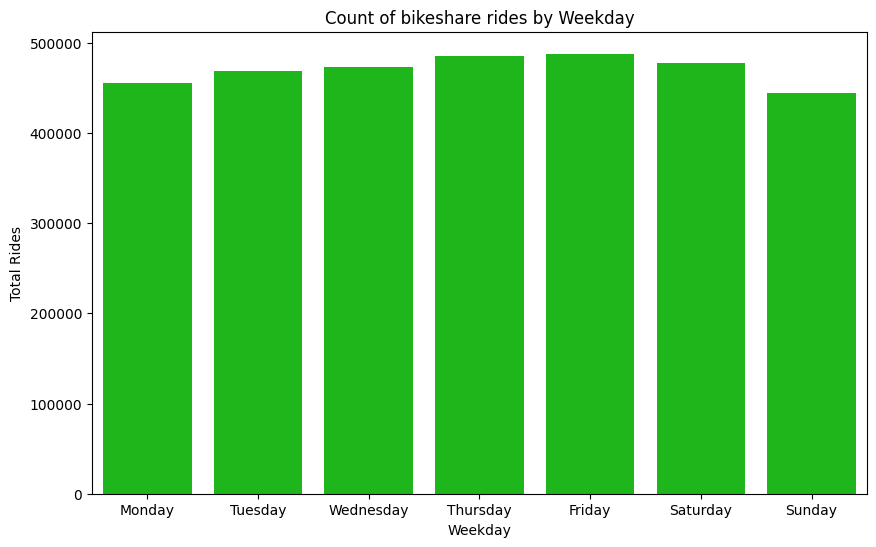

In [42]:
plt.figure(figsize=(10,6))

sns.barplot(x='weekday', y='cnt', data=weekday_users_df, order=day_order, color='#06D001')

plt.xlabel("Weekday")
plt.ylabel("Total Rides")
plt.title("Count of bikeshare rides by Weekday")

plt.show()

- Sepertinya jumlah pengguna bikeshare cukup merata di hari kerja
- Selanjutnya, untuk melihat perbedaan antara pola pengguna bikeshare biasa dan terdaftar pada hari kerja, kami akan membatalkan pivot `weekday_users_df`

In [43]:
weekday_users_df_unpivoted = pd.melt(weekday_users_df,
                                      id_vars=['weekday'],
                                      value_vars=['casual', 'registered'],
                                      var_name='status',
                                      value_name='count')

In [44]:
weekday_users_df_unpivoted

,weekday,status,count
0,Friday,casual,78238
1,Monday,casual,70784
2,Saturday,casual,153852
3,Sunday,casual,140521
4,Thursday,casual,61460
5,Tuesday,casual,57843
6,Wednesday,casual,57319
7,Friday,registered,409552
8,Monday,registered,384719
9,Saturday,registered,323955


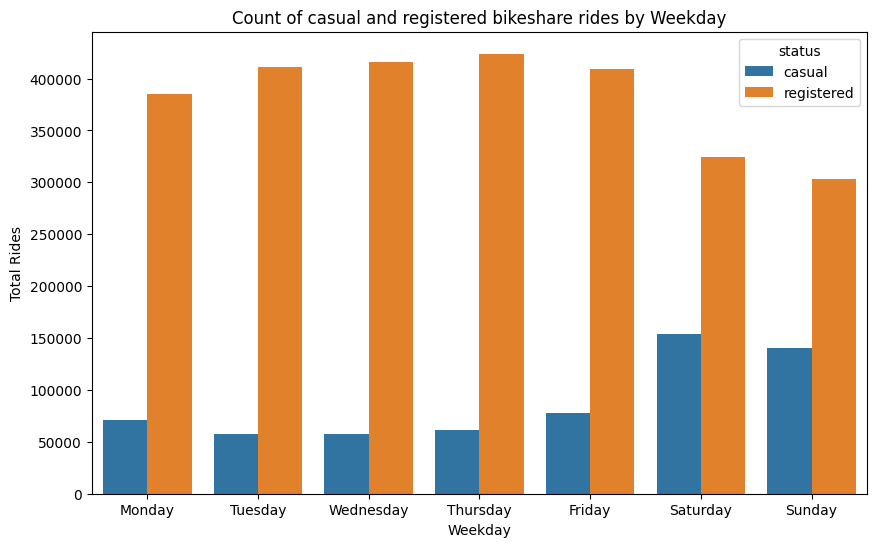

In [45]:
plt.figure(figsize=(10,6))

sns.barplot(x='weekday', y='count', data=weekday_users_df_unpivoted, order=day_order, hue='status')

plt.xlabel("Weekday")
plt.ylabel("Total Rides")
plt.title("Count of casual and registered bikeshare rides by Weekday")

plt.show()

**Insight**
1. Saat kami memisahkan jumlah perjalanan bikeshare antara pengguna biasa dan pengguna terdaftar, kami melihat pola yang menarik di sini.
2. Jumlah perjalanan santai lebih banyak pada akhir pekan, sedangkan jumlah perjalanan terdaftar lebih banyak pada hari kerja.
3. Menambah wawasan yang kami temukan tentang perjalanan setiap jam, hal ini semakin mendukung bahwa pengguna terdaftar mungkin menggunakan sepeda untuk bekerja secara rutin selama hari kerja, sedangkan pengguna biasa menggunakan sepeda untuk bersantai di akhir pekan.

### 6.3. Apakah ada korelasi antara suhu yang mengindikasikan kondisi saat aktivitas berbagi sepeda sedang tinggi?

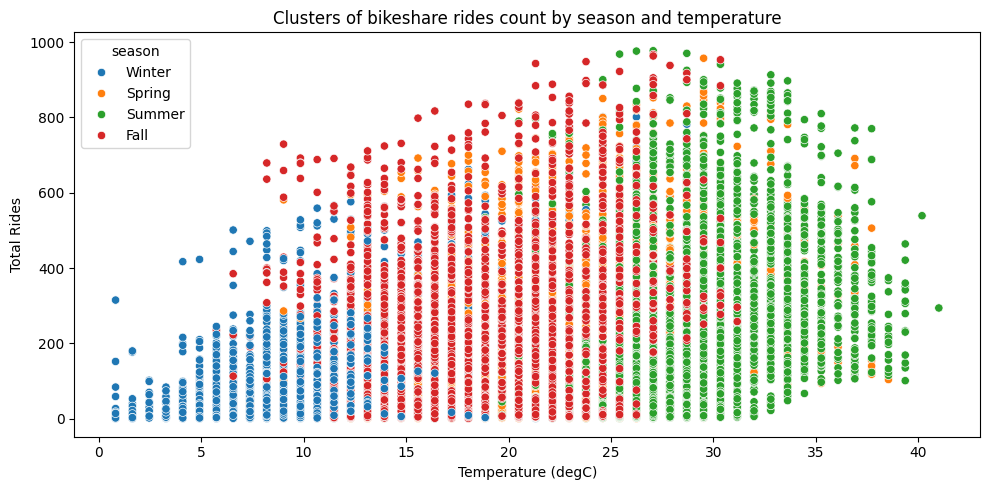

In [46]:
plt.figure(figsize=(10,5))

sns.scatterplot(x='temp', y='cnt', data=df, hue='season')

plt.xlabel("Temperature (degC)")
plt.ylabel("Total Rides")
plt.title("Clusters of bikeshare rides count by season and temperature")

# Show the plot
plt.tight_layout()
plt.show()

**Insight**
1. Pada grafik di atas, pada saat suhu sedang rendah, jumlah perjalanan bikeshare juga rendah. Hal ini terjadi selama musim dingin.
2. Saat suhu tinggi, jumlah perjalanan bikeshare juga meningkat. Hal ini terjadi selama musim panas.
3. Namun, tampaknya ada “titik manis” suhu di mana jumlah perjalanan bikeshare adalah yang tertinggi. Kita bisa melihatnya di cluster musim gugur dan musim panas. Suhu "sweet-spot" adalah antara 20degC hingga 30degC.
4. Pada hari-hari dengan kondisi suhu seperti itu, diperkirakan jumlah perjalanan bikeshare akan tinggi.

### 6.4. Musim apa yang paling banyak aktivitas berbagi sepeda?

In [47]:
seasonly_users_df = df.groupby("season").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

seasonly_users_df.head()

,casual,registered,cnt
season,,,
Fall,129782,711831,841613
Spring,203522,715067,918589
Summer,226091,835038,1061129
Winter,60622,410726,471348


In [48]:
seasonly_users_df = seasonly_users_df.reset_index()
seasonly_users_df

,season,casual,registered,cnt
0,Fall,129782,711831,841613
1,Spring,203522,715067,918589
2,Summer,226091,835038,1061129
3,Winter,60622,410726,471348


In [49]:
season_order = ['Spring', 'Summer', 'Fall', 'Winter']

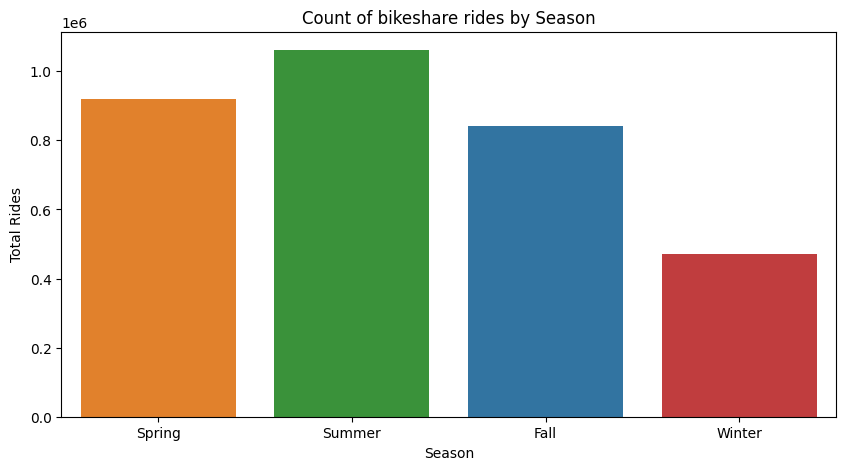

In [50]:
plt.figure(figsize=(10,5))

sns.barplot(x="season", y="cnt", data=seasonly_users_df, order=season_order, hue='season')

plt.xlabel("Season")
plt.ylabel("Total Rides")
plt.title("Count of bikeshare rides by Season")

plt.show()

- Jumlah pengguna bikeshare tertinggi pada musim panas, dan terendah pada musim dingin.
- Selanjutnya, untuk melihat perbedaan antara pola pengguna bikeshare biasa dan terdaftar di setiap musim, kami akan membatalkan pivot `season_users_df`

In [51]:
seasonly_users_df_unpivoted = pd.melt(seasonly_users_df,
                                      id_vars=['season'],
                                      value_vars=['casual', 'registered'],
                                      var_name='status',
                                      value_name='count')

In [52]:
seasonly_users_df_unpivoted

,season,status,count
0,Fall,casual,129782
1,Spring,casual,203522
2,Summer,casual,226091
3,Winter,casual,60622
4,Fall,registered,711831
5,Spring,registered,715067
6,Summer,registered,835038
7,Winter,registered,410726


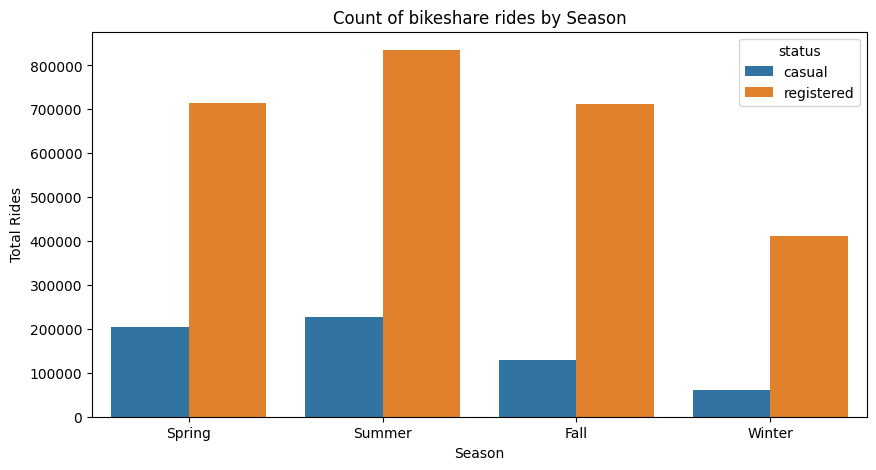

In [53]:
plt.figure(figsize=(10,5))

sns.barplot(x='season', y='count', data=seasonly_users_df_unpivoted, order=season_order, hue='status')

plt.xlabel("Season")
plt.ylabel("Total Rides")
plt.title("Count of bikeshare rides by Season")

plt.show()

**Insight**
- Jumlah perjalanan bikeshare tertinggi selama musim panas, dan terendah selama musim dingin.
- Tidak ada perbedaan besar antara pola perjalanan santai dan terdaftar selama musim, keduanya tertinggi di Musim Panas dan terendah selama Musim Dingin.

## 7. Conclusion
___

### 7.1 Bagaimana tren jumlah pengguna sepeda berbagi dalam beberapa tahun terakhir?

> Jumlah perjalanan bikeshare pada tahun 2012 lebih tinggi dibandingkan tahun 2011. Kedua tahun tersebut menunjukkan tren dan musim yang sama, dengan jumlah perjalanan meningkat pada pertengahan tahun dan menurun pada awal dan akhir tahun.

### 7.2 Bagaimana pola penggunaan wahana bike sharing berdasarkan hari dalam seminggu?

> - Untuk pengguna terdaftar, jumlah perjalanan lebih tinggi pada hari kerja. Hal ini konsisten dengan temuan pada pertanyaan 2, yang menunjukkan bahwa pengguna terdaftar kemungkinan besar menggunakan sepeda untuk bepergian ke tempat kerja.
> - Bagi pengguna biasa, jumlah bersepeda lebih tinggi pada akhir pekan dibandingkan pada hari kerja, hal ini menunjukkan bahwa mereka menggunakan sepeda untuk aktivitas santai di akhir pekan.

### 7.3 Apakah cuaca mempengaruhi penggunaan bikeshare?

> Ya, jumlah perjalanan jauh lebih tinggi saat cuaca cerah dibandingkan saat kondisi cuaca lebih ekstrem.

### 7.4 Pada musim apa jumlah aktivitas berbagi sepeda tertinggi?

> Jumlah perjalanan bikeshare tertinggi terjadi pada musim panas dan terendah pada musim dingin.

## RFM Analysis

In [54]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,January,0,0,Saturday,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,Winter,2011,January,1,0,Saturday,0,1,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,Winter,2011,January,2,0,Saturday,0,1,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,Winter,2011,January,3,0,Saturday,0,1,9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01,Winter,2011,January,4,0,Saturday,0,1,9.84,14.395,75.0,0.0,0,1,1


In [55]:
rfm_df = df.groupby(by="weekday", as_index=False).agg({
    "dteday": "max",
    "instant": "nunique",
    "cnt": "sum"
})
rfm_df.columns = ["day", "max_order_timestamp", "frequency", "monetary"]

rfm_df

,day,max_order_timestamp,frequency,monetary
0,Friday,2012-12-28,2487,487790
1,Monday,2012-12-31,2479,455503
2,Saturday,2012-12-29,2512,477807
3,Sunday,2012-12-30,2502,444027
4,Thursday,2012-12-27,2471,485395
5,Tuesday,2012-12-25,2453,469109
6,Wednesday,2012-12-26,2475,473048


In [56]:
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = df["dteday"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
rfm_df.head()

,day,max_order_timestamp,frequency,monetary,recency
0,Friday,2012-12-28,2487,487790,3
1,Monday,2012-12-31,2479,455503,0
2,Saturday,2012-12-29,2512,477807,2
3,Sunday,2012-12-30,2502,444027,1
4,Thursday,2012-12-27,2471,485395,4


In [57]:
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,day,frequency,monetary,recency
0,Friday,2487,487790,3
1,Monday,2479,455503,0
2,Saturday,2512,477807,2
3,Sunday,2502,444027,1
4,Thursday,2471,485395,4


In [58]:
rfm_df.describe()

,frequency,monetary,recency
count,7.000000,7.000000,7.000000
mean,2482.714286,470382.714286,3.000000
std,19.754445,15854.852072,2.160247
min,2453.000000,444027.000000,0.000000
25%,2473.000000,462306.000000,1.500000
50%,2479.000000,473048.000000,3.000000
75%,2494.500000,481601.000000,4.500000
max,2512.000000,487790.000000,6.000000


In [59]:
rfm_df.sort_values(by="recency", ascending=True).head(5)

,day,frequency,monetary,recency
1,Monday,2479,455503,0
3,Sunday,2502,444027,1
2,Saturday,2512,477807,2
0,Friday,2487,487790,3
4,Thursday,2471,485395,4


In [60]:
rfm_df.sort_values(by="frequency", ascending=False).head(5)

,day,frequency,monetary,recency
2,Saturday,2512,477807,2
3,Sunday,2502,444027,1
0,Friday,2487,487790,3
1,Monday,2479,455503,0
6,Wednesday,2475,473048,5


C:\Users\User\AppData\Local\Temp\ipykernel_11772\1577329757.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="day", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
C:\Users\User\AppData\Local\Temp\ipykernel_11772\1577329757.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="day", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
C:\Users\User\AppData\Local\Temp\ipykernel_11772\1577329757.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effec

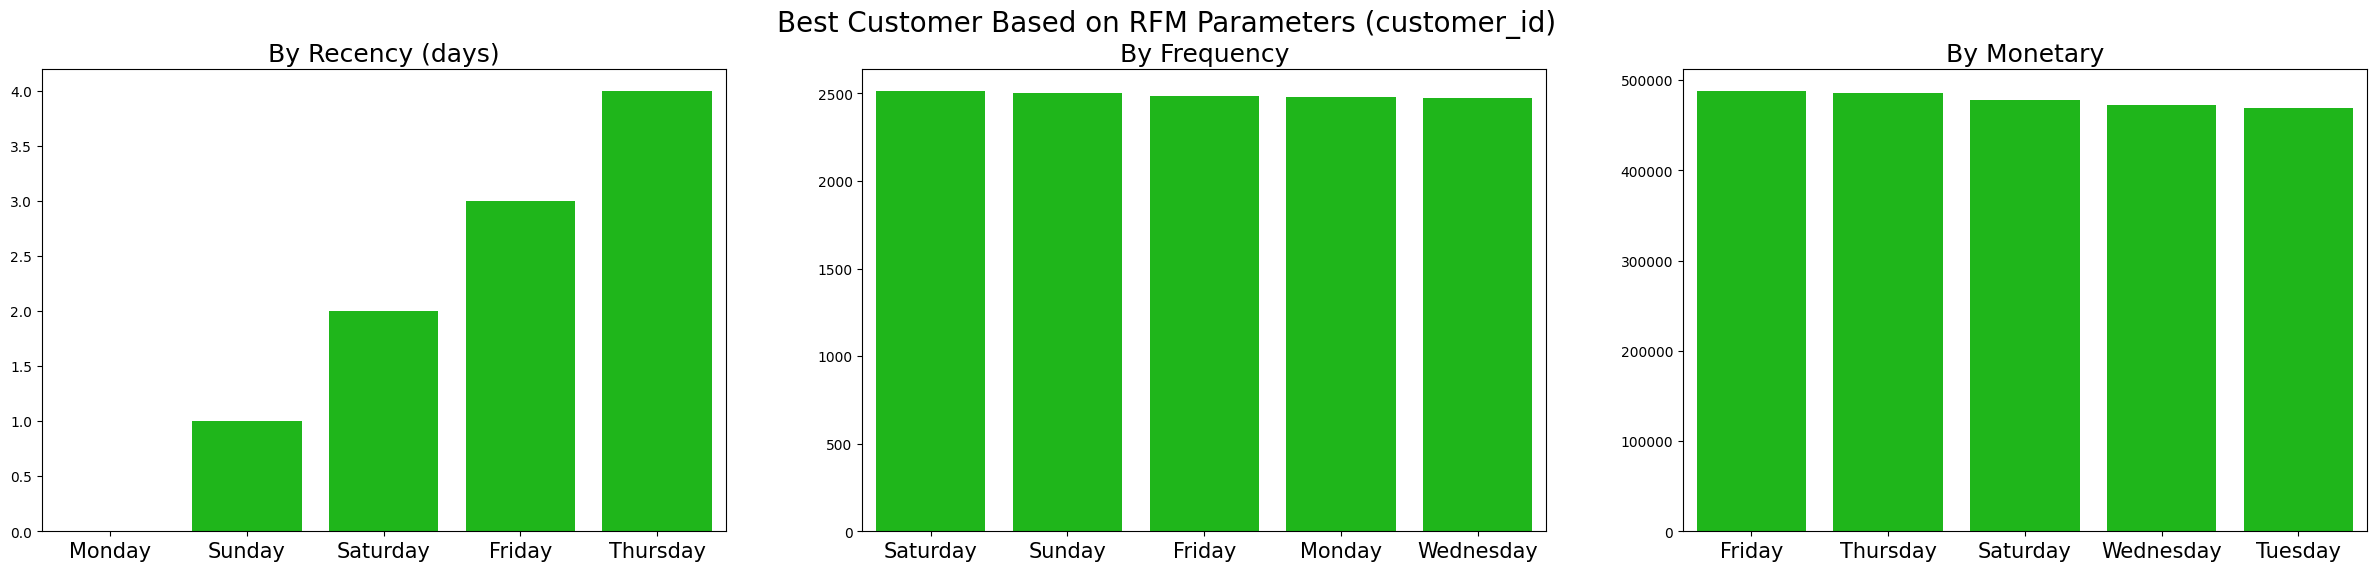

In [61]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#06D001", "#06D001", "#06D001", "#06D001", "#06D001"]

sns.barplot(y="recency", x="day", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="frequency", x="day", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary", x="day", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

### Mengurutkan customer berdasarkan recency, frequency, & monetary score


In [62]:
rfm_df['r_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['f_rank'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['m_rank'] = rfm_df['monetary'].rank(ascending=True)

rfm_df.head()

,day,frequency,monetary,recency,r_rank,f_rank,m_rank
0,Friday,2487,487790,3,4.0,5.0,7.0
1,Monday,2479,455503,0,7.0,4.0,2.0
2,Saturday,2512,477807,2,5.0,7.0,5.0
3,Sunday,2502,444027,1,6.0,6.0,1.0
4,Thursday,2471,485395,4,3.0,2.0,6.0


In [63]:
rfm_df['r_rank_norm'] = (rfm_df['r_rank']/rfm_df['r_rank'].max())*100
rfm_df['f_rank_norm'] = (rfm_df['f_rank']/rfm_df['f_rank'].max())*100
rfm_df['m_rank_norm'] = (rfm_df['m_rank']/rfm_df['m_rank'].max())*100
 
rfm_df.drop(columns=['r_rank', 'f_rank', 'm_rank'], inplace=True)
 
rfm_df.head()

,day,frequency,monetary,recency,r_rank_norm,f_rank_norm,m_rank_norm
0,Friday,2487,487790,3,57.142857,71.428571,100.000000
1,Monday,2479,455503,0,100.000000,57.142857,28.571429
2,Saturday,2512,477807,2,71.428571,100.000000,71.428571
3,Sunday,2502,444027,1,85.714286,85.714286,14.285714
4,Thursday,2471,485395,4,42.857143,28.571429,85.714286


In [64]:
rfm_df['RFM_score'] = 0.15*rfm_df['r_rank_norm']+0.28 * \
    rfm_df['f_rank_norm']+0.57*rfm_df['m_rank_norm']
rfm_df['RFM_score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['day', 'RFM_score']].head(7)

,day,RFM_score
0,Friday,4.28
1,Monday,2.36
2,Saturday,3.97
3,Sunday,2.25
4,Thursday,3.16
5,Tuesday,1.53
6,Wednesday,2.44


### Segmentasi customer berdasarkan RFM_score


In [65]:
rfm_df["customer_segment"] = np.where(
    rfm_df['RFM_score'] > 4.5, "Top customers", (np.where(
        rfm_df['RFM_score'] > 4, "High value customer",(np.where(
            rfm_df['RFM_score'] > 3, "Medium value customer", np.where(
                rfm_df['RFM_score'] > 1.6, 'Low value customers', 'lost customers'))))))

rfm_df[['day', 'RFM_score', 'customer_segment']].head(20)

,day,RFM_score,customer_segment
0,Friday,4.28,High value customer
1,Monday,2.36,Low value customers
2,Saturday,3.97,Medium value customer
3,Sunday,2.25,Low value customers
4,Thursday,3.16,Medium value customer
5,Tuesday,1.53,lost customers
6,Wednesday,2.44,Low value customers


In [66]:
customer_segment_df = rfm_df.groupby(by="customer_segment", as_index=False).day.nunique()
customer_segment_df

,customer_segment,day
0,High value customer,1
1,Low value customers,3
2,Medium value customer,2
3,lost customers,1


In [67]:
customer_segment_df['customer_segment'] = pd.Categorical(customer_segment_df['customer_segment'], [
    "lost customers", "Low value customers", "Medium value customer",
    "High value customer"
])

C:\Users\User\AppData\Local\Temp\ipykernel_11772\2133562988.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\User\AppData\Local\Temp\ipykernel_11772\2133562988.py:4: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(


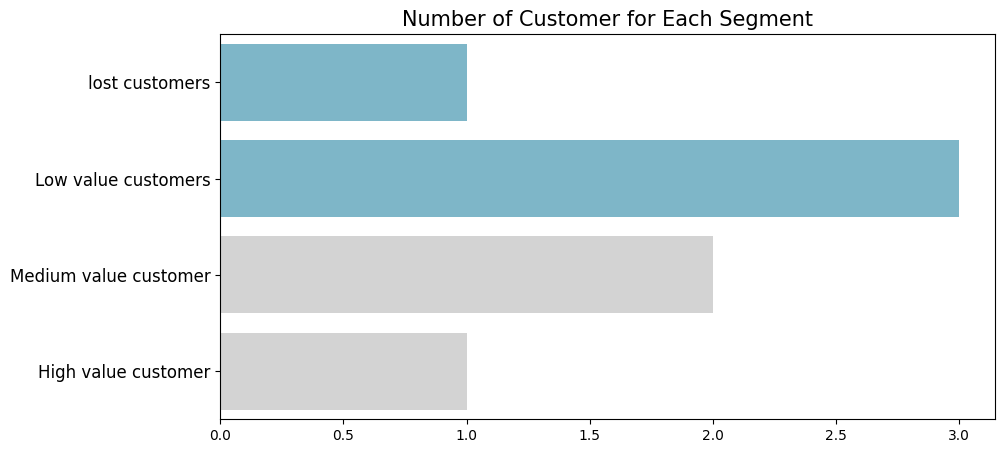

In [68]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="day", 
    y="customer_segment",
    data=customer_segment_df.sort_values(by="customer_segment", ascending=False),
    palette=colors_
)
plt.title("Number of Customer for Each Segment", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

In [69]:
df.to_csv("Dashboard/clean_data.csv", index=False)